In [ ]:
import pandas as pd
import sqlite3 as sql

In [ ]:
conn = sql.connect('/content/sql-murder-mystery.db')

In [ ]:
conn

In [ ]:
q = '''
SELECT * FROM crime_scene_report WHERE city = 'SQL City' ORDER BY date ASC;
'''
pd.read_sql_query(q,conn)

,date,type,description,city
0,20170712,theft,"A lone hunter stalks the night, firing arrows ...",SQL City
1,20170820,arson,"Wield the Hammer of Sol with honor, Titan, it ...",SQL City
2,20171110,robbery,The Gjallarhorn shoulder-mounted rocket system...,SQL City
3,20180103,bribery,"Apparently, Cayde thought it necessary to expo...",SQL City
4,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot hi...",SQL City
5,20180115,assault,Report Not Found,SQL City
6,20180115,murder,Security footage shows that there were 2 witne...,SQL City
7,20180215,murder,REDACTED REDACTED REDACTED,SQL City
8,20180215,murder,Someone killed the guard! He took an arrow to ...,SQL City




---



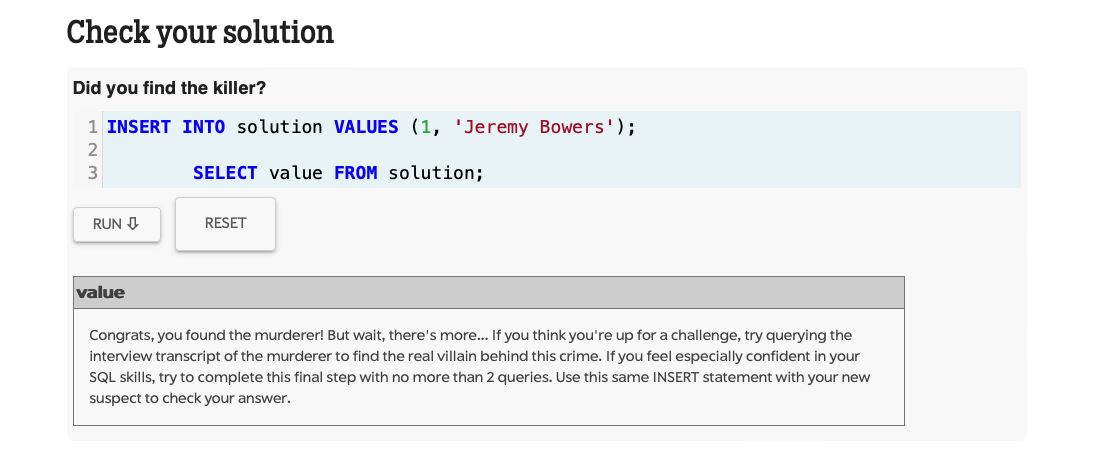
1.  Retrieve Crime Scene Report:
Task: Run a query to retrieve the crime scene report for the murder that occurred on Jan.15, 2018, in SQL City. Gather all available details from the report.

In [ ]:
q1 = '''
SELECT * FROM crime_scene_report WHERE city = 'SQL City' AND date = '20180115';
'''
pd.read_sql_query(q1,conn)

,date,type,description,city
0,20180115,assault,"Hamilton: Lee, do you yield? Burr: You shot hi...",SQL City
1,20180115,assault,Report Not Found,SQL City
2,20180115,murder,Security footage shows that there were 2 witne...,SQL City




---

2. Witness Personal Details:
Task: Check the personal details of witnesses involved in the case. Retrieve their names, addresses, and any other relevant information.


In [ ]:
q2 = '''
SELECT * FROM person where address_street_name = 'Northwestern Dr' ORDER BY address_number DESC;
'''
pd.read_sql_query(q2,conn)[:1]

,id,name,license_id,address_number,address_street_name,ssn
0,14887,Morty Schapiro,118009,4919,Northwestern Dr,111564949


In [ ]:
q3 = '''
SELECT * FROM person where address_street_name = 'Franklin Ave' ORDER BY name ASC;
'''
pd.read_sql_query(q3,conn)[:5]

,id,name,license_id,address_number,address_street_name,ssn
0,33793,Amado Mattan,161915,99,Franklin Ave,125205748
1,16371,Annabel Miller,490173,103,Franklin Ave,318771143
2,46827,Bev Billiter,643591,2316,Franklin Ave,940192302
3,78658,Blake Chrones,310242,2014,Franklin Ave,423048084
4,97913,Cameron Dilick,971988,2954,Franklin Ave,665147939


In [ ]:
'WITNESS 2 name is Annabel'

q4 = '''
SELECT * FROM person where address_street_name = 'Franklin Ave' AND name LIKE '%Annabel%';
'''
pd.read_sql_query(q4,conn)

,id,name,license_id,address_number,address_street_name,ssn
0,16371,Annabel Miller,490173,103,Franklin Ave,318771143


FINDING:

1. WITNESS 1 🇰IS 14887	Morty Schapiro
2. ANABEL MILLER ID = 16371



---

3. View Witness Interviews:
Task: Access the recorded interviews of witnesses conducted after the murder. Gather insights into their statements and potential clues.


In [ ]:
q5 = '''
SELECT * FROM interview where person_id = '14887';
'''
pd.read_sql_query(q5,conn)

,person_id,transcript
0,14887,I heard a gunshot and then saw a man run out. ...


In [ ]:
'pid of annabel from the above is 16371'

q6 = '''
SELECT * FROM interview where person_id = '16371';
'''
pd.read_sql_query(q6,conn)

,person_id,transcript
0,16371,"I saw the murder happen, and I recognized the ..."




---


4. Check Gym Database:
Task: Investigate the gym database using details obtained from the crime scene report and witness interviews. Look for any gym-related information that might be relevant.


In [ ]:
q7 = '''
SELECT * FROM get_fit_now_member;
'''
pd.read_sql_query(q7,conn)[:5]

,id,person_id,name,membership_start_date,membership_status
0,NL318,65076,Everette Koepke,20170926,gold
1,AOE21,39426,Noe Locascio,20171005,regular
2,2PN28,63823,Jeromy Heitschmidt,20180215,silver
3,0YJ24,80651,Waneta Wellard,20171206,gold
4,3A08L,32858,Mei Bianchin,20170401,silver


In [ ]:
'on jan 9th'
q8 = '''
SELECT * FROM get_fit_now_check_in WHERE check_in_date = '20180109' AND membership_id LIKE '48Z%';
'''

pd.read_sql_query(q8,conn)

,membership_id,check_in_date,check_in_time,check_out_time
0,48Z7A,20180109,1600,1730
1,48Z55,20180109,1530,1700


In [ ]:
'Join the db and id to get the names of the memebers'

q9 = '''
SELECT * FROM get_fit_now_member
WHERE ID = '48Z7A';
'''

pd.read_sql_query(q9,conn)

,id,person_id,name,membership_start_date,membership_status
0,48Z7A,28819,Joe Germuska,20160305,gold


In [ ]:
'Join the db and id to get the names of the memebers'

q9a = '''
SELECT * FROM get_fit_now_member
WHERE ID = '48Z55';
'''

pd.read_sql_query(q9a,conn)

,id,person_id,name,membership_start_date,membership_status
0,48Z55,67318,Jeremy Bowers,20160101,gold


FINDINGS:
1. 28819	Joe Germuska
2. 67318	Jeremy Bowers



---
5. Check Car Details:
Task: Examine the car details associated with the crime scene. Retrieve information about the vehicles present during the incident.



In [ ]:
q10 = '''
SELECT * FROM drivers_license;
'''

pd.read_sql_query(q10,conn)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
2,101029,62,74,green,green,female,VKY5KR,Scion,xB
3,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
4,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
...,...,...,...,...,...,...,...,...,...
10002,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500
10003,999940,71,61,green,green,male,1B8QN8,Mitsubishi,Eclipse
10004,999981,67,69,brown,blue,female,1684K3,Land Rover,LR2
10005,999986,49,58,green,grey,male,F8F64H,Lexus,LS




---

6. Personal Details:
Task: Identify and collect personal details mentioned in the previous query. This includes names, addresses, and any additional details.

In [ ]:
q11 = '''

SELECT * FROM person
INNER JOIN drivers_license
ON person.license_id = drivers_license.id
WHERE name = 'Joe Germuska';
'''

pd.read_sql_query(q11,conn)

,id,name,license_id,address_number,address_street_name,ssn,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model


In [ ]:
q11a = '''

SELECT * FROM person
INNER JOIN drivers_license
ON person.license_id = drivers_license.id
WHERE name = 'Jeremy Bowers';
'''

pd.read_sql_query(q11a,conn)

,id,name,license_id,address_number,address_street_name,ssn,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,67318,Jeremy Bowers,423327,530,"Washington Pl, Apt 3A",871539279,423327,30,70,brown,brown,male,0H42W2,Chevrolet,Spark LS


FINGINGS:
1. JOE DOESNT HAVE A CAR
2. JEMERY HAS. (KILLER)



---

7. Membership Status at the Gym:
Task: Determine who is identified in the previous query as a member of the gym. Utilize the gym database to confirm their membership status.


In [ ]:
q12 = '''

SELECT * FROM get_fit_now_member WHERE person_id = '67318';
'''

pd.read_sql_query(q12,conn)

,id,person_id,name,membership_start_date,membership_status
0,48Z55,67318,Jeremy Bowers,20160101,gold


FIDNINGS:
1. JEREMY HAS GOLD MEMBERSHIP



---

8. Analyze and Draw Conclusions:
Task: Analyze the collected data, including crime scene reports, witness interviews, gym records, and car details. Draw conclusions or hypotheses based on the information available.


In [ ]:
q13 = '''
SELECT * FROM interview WHERE person_id='67318';
'''

pd.read_sql_query(q13,conn)


,person_id,transcript
0,67318,I was hired by a woman with a lot of money. I ...


In [ ]:


pd.read_sql_query(q10,conn)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,100280,72,57,brown,red,male,P24L4U,Acura,MDX
1,100460,63,72,brown,brown,female,XF02T6,Cadillac,SRX
2,101029,62,74,green,green,female,VKY5KR,Scion,xB
3,101198,43,54,amber,brown,female,Y5NZ08,Nissan,Rogue
4,101255,18,79,blue,grey,female,5162Z1,Lexus,GS
...,...,...,...,...,...,...,...,...,...
10002,999923,19,77,amber,black,female,5L0ZI4,GMC,Sierra 3500
10003,999940,71,61,green,green,male,1B8QN8,Mitsubishi,Eclipse
10004,999981,67,69,brown,blue,female,1684K3,Land Rover,LR2
10005,999986,49,58,green,grey,male,F8F64H,Lexus,LS


In [ ]:
q14 ='''
SELECT * FROM drivers_license WHERE gender = 'female' AND hair_color = 'red'
AND car_make = 'Tesla' AND car_model = 'Model S';
'''

pd.read_sql_query(q14,conn)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S
1,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,918773,48,65,black,red,female,917UU3,Tesla,Model S


FINDINGS:

SUSPECT IDs
1. 202298
2. 291182
3. 918773

"around 5'5" (65") or 5'7" (67")."

In [ ]:
q15 ='''
SELECT * FROM drivers_license WHERE id = '202298'
OR id= '291182'
OR id = '918773' AND (height = '65' OR height = '67');
'''

pd.read_sql_query(q15,conn)

,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,202298,68,66,green,red,female,500123,Tesla,Model S
1,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,918773,48,65,black,red,female,917UU3,Tesla,Model S


In [ ]:
q16 ='''
SELECT person.id,name FROM person
INNER JOIN drivers_license
ON person.license_id = drivers_license.id
WHERE drivers_license.id = '202298'
OR drivers_license.id= '291182'
OR drivers_license.id = '918773';
'''

pd.read_sql_query(q16,conn)

,id,name
0,99716,Miranda Priestly
1,90700,Regina George
2,78881,Red Korb


In [ ]:
q16 ='''

SELECT *
FROM person
INNER JOIN drivers_license ON person.license_id = drivers_license.id
WHERE drivers_license.id = '202298'
OR drivers_license.id= '291182'
OR drivers_license.id = '918773'
;
'''

pd.read_sql_query(q16,conn)

,id,name,license_id,address_number,address_street_name,ssn,id,age,height,eye_color,hair_color,gender,plate_number,car_make,car_model
0,99716,Miranda Priestly,202298,1883,Golden Ave,987756388,202298,68,66,green,red,female,500123,Tesla,Model S
1,90700,Regina George,291182,332,Maple Ave,337169072,291182,65,66,blue,red,female,08CM64,Tesla,Model S
2,78881,Red Korb,918773,107,Camerata Dr,961388910,918773,48,65,black,red,female,917UU3,Tesla,Model S


SQL SYMPHONE DATA CHECK WITH THESE IDs

In [ ]:
'I know that she attended the SQL Symphony Concert 3 times in December 2017.'

q17 ='''

SELECT *
FROM facebook_event_checkin
WHERE event_name = 'SQL Symphony Concert' and person_id in (99716,90700,78881);
'''

pd.read_sql_query(q17,conn)

,person_id,event_id,event_name,date
0,99716,1143,SQL Symphony Concert,20171206
1,99716,1143,SQL Symphony Concert,20171212
2,99716,1143,SQL Symphony Concert,20171229


In [ ]:
#CONFIRMED :: Person with ID = 99716 is the murderer.

murderer = '''
select * from person WHERE id = '99716';
'''
pd.read_sql_query(murderer,conn)

,id,name,license_id,address_number,address_street_name,ssn
0,99716,Miranda Priestly,202298,1883,Golden Ave,987756388


**Document Finding**

From appropraite means we were able to find the killer names Jeremy but hired by a lady mastermind with name of Miranda. Using the Concert and appearace along with the car model i.e tesla model S. We are able to find the correct Murderer.



---



---

# **MURDER REPORT**


Date: February 9th, 2018

Summary:

The following report outlines the findings of the recent homicide investigation involving the victim. The primary suspect, Jeremy Bowers, and the alleged mastermind, Miranda Priestly, were identified through a collaborative effort.

Crime Information:


Date of Incident: January 15, 2018
Place of Incident: SQL City
Cause of Death: Gunshot Wounds

Suspects:

Primary Suspect: Jeremy Bowers
Membership: Gym Gold Membership
Weapon: Firearm (Gun)
Witness Accounts: Two Witnesses Confirmed
Mastermind: Miranda Priestly
Connection: Hired Jeremy for the Crime


Conclusion:

Based on the evidence gathered, Jeremy Bowers is identified as the primary suspect responsible for the fatal shooting of the victim. Miranda Priestly is believed to be the mastermind behind the orchestrated crime.


---



---



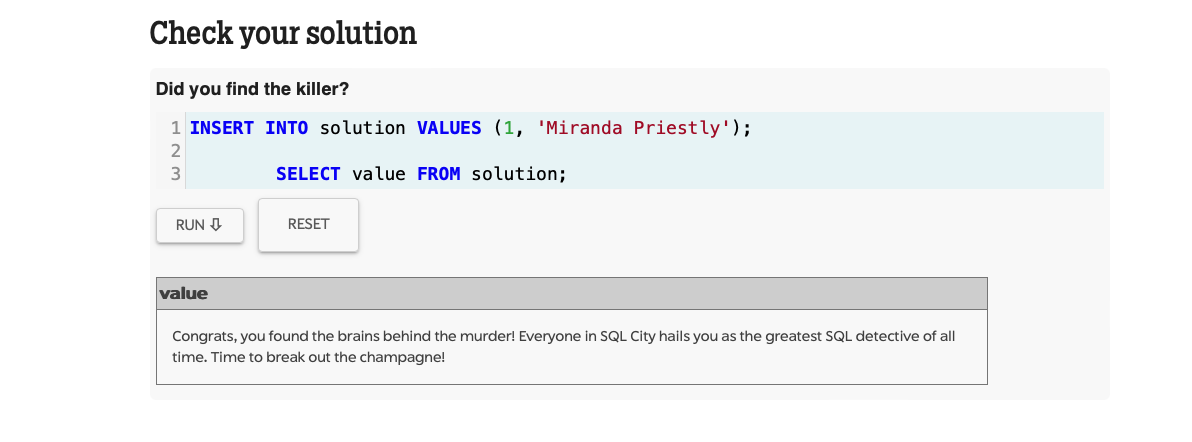